# Linear models

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection, metrics, datasets
from matplotlib.colors import ListedColormap
%matplotlib inline

In [16]:
blobs = datasets.make_blobs(centers=2, cluster_std=5.5, random_state=1)
colors = ListedColormap(['red', 'blue'])

In [17]:
print(blobs[1][:10])

[0 1 0 0 1 1 1 1 0 0]


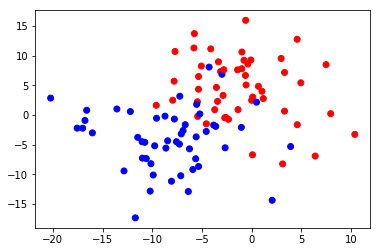

In [18]:
plt.Figure(figsize=(8,8))
plt.scatter([x[0] for x in blobs[0]], [x[1] for x in blobs[0]], c=blobs[1], cmap=colors)

In [20]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(blobs[0], blobs[1], test_size=0.3, random_state=1)

#### Тренировка линейных моделей

In [31]:
ridge = linear_model.RidgeClassifier(random_state=1)

In [32]:
ridge.fit(X_train, Y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=1, solver='auto',
        tol=0.001)

In [33]:
ridge_preds = ridge.predict(X_test)

In [34]:
print(ridge_preds)

[0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [35]:
print(metrics.accuracy_score(ridge_preds, Y_test))

0.8666666666666667


In [36]:
ridge.coef_

array([[-0.0854443 , -0.07273219]])

In [37]:
ridge.intercept_

array([-0.31250723])

#### Logistic Regression

In [68]:
logi = linear_model.LogisticRegression(solver='liblinear', random_state=1)

In [69]:
logi.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [70]:
logipreds = logi.predict(X_test)

In [71]:
print(logipreds)

[0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1]


In [72]:
print(metrics.accuracy_score(logipreds, Y_test))

0.8


In [73]:
probs = logi.predict_proba(X_test)

#### Cross validation of linear models

In [92]:
import sklearn
ridge_valid = sklearn.model_selection.cross_val_score(ridge, blobs[0], blobs[1], scoring='accuracy', n_jobs=-1, cv=10)

In [75]:
logivalid = sklearn.model_selection.cross_val_score(logi, blobs[0], blobs[1], scoring='accuracy', n_jobs=-1, cv=10)

In [76]:
print('ridge params: mean is {}, max {}, min {}, std {}'.format(ridge_valid.mean(), ridge_valid.max(),
                                                              ridge_valid.min(), ridge_valid.std()))

ridge params: mean is 0.8800000000000001, max 1.0, min 0.7, std 0.08717797887081348


In [77]:
print('logreg params: mean is {}, max {}, min {}, std {}'.format(logivalid.mean(), logivalid.max(),
                                                              logivalid.min(), logivalid.std()))

logreg params: mean is 0.8700000000000001, max 1.0, min 0.7, std 0.10049875621120892


In [78]:
ridge_valid

array([0.8, 0.9, 0.9, 0.9, 1. , 1. , 0.7, 0.9, 0.9, 0.8])

In [79]:
logivalid

array([0.7, 0.9, 0.9, 0.9, 1. , 1. , 0.7, 0.9, 0.9, 0.8])

#### cross val score с заданными значениями scorer и cv_strategy

In [80]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [95]:
cv_strategy = model_selection.StratifiedShuffleSplit(n_splits=20, test_size=0.3, random_state=2)

In [96]:
ridgecv = sklearn.model_selection.cross_val_score(ridge, blobs[0], blobs[1], scoring=scorer, cv=cv_strategy)

In [98]:
print('ridgecv params: mean is {}, max {}, min {}, std {}'.format(ridgecv.mean(), ridgecv.max(),
                                                              ridgecv.min(), ridgecv.std()))

ridgecv params: mean is 0.8700000000000001, max 1.0, min 0.7666666666666667, std 0.059535236998305825


In [99]:
logicv = sklearn.model_selection.cross_val_score(logi, blobs[0], blobs[1], scoring=scorer, cv=cv_strategy)

In [100]:
print('logicv params: mean is {}, max {}, min {}, std {}'.format(logicv.mean(), logicv.max(),
                                                              logicv.min(), logicv.std()))

logicv params: mean is 0.8766666666666667, max 1.0, min 0.7666666666666667, std 0.06155395104206462
